In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 (dollars) and standard deviation 2.50 (dollars). A company in this industry employs 40 workers, paying them an average of 12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [2]:
n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

In [3]:
Z = (xbar - mu) / (sigma / np.sqrt(n))
Z

-2.5298221281347035

In [5]:
P = stats.norm.cdf(Z) # left side area
P

0.005706018193000826

In [6]:
 # (α = 1% --> 1-99%)
alpha = 0.01  

In [7]:
## WE CAN SAY __Reject the Null__ BECAUSE IT IS LARGER THAN ALPHA P VALUE

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [8]:
α = 0.01

In [9]:
soil = pd.read_csv("soil - Sheet1.csv")
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [13]:
soil.isnull()

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
soil["Soil1"].mean()

1.6918

In [11]:
soil["Soil2"].mean()

1.4171142857142858

In [12]:
stats.ttest_ind(soil["Soil1"], soil["Soil2"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [14]:
indTest = stats.ttest_ind(soil["Soil1"], soil["Soil2"], nan_policy='omit')

indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [15]:
t = indTest.statistic
t

5.1681473319343345

In [16]:
p_value = indTest.pvalue
p_value

2.5932287323528147e-06

In [18]:
# alpha/2 = 0.005
alpha = 0.01     

## __Reject the Null__

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [50]:
pisa = pd.read_csv("/content/2015 PISA Test - Sheet1.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [51]:
pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [52]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [53]:
#because of "nan"
pisa['Continent_Code'].fillna(value='NA', inplace = True)

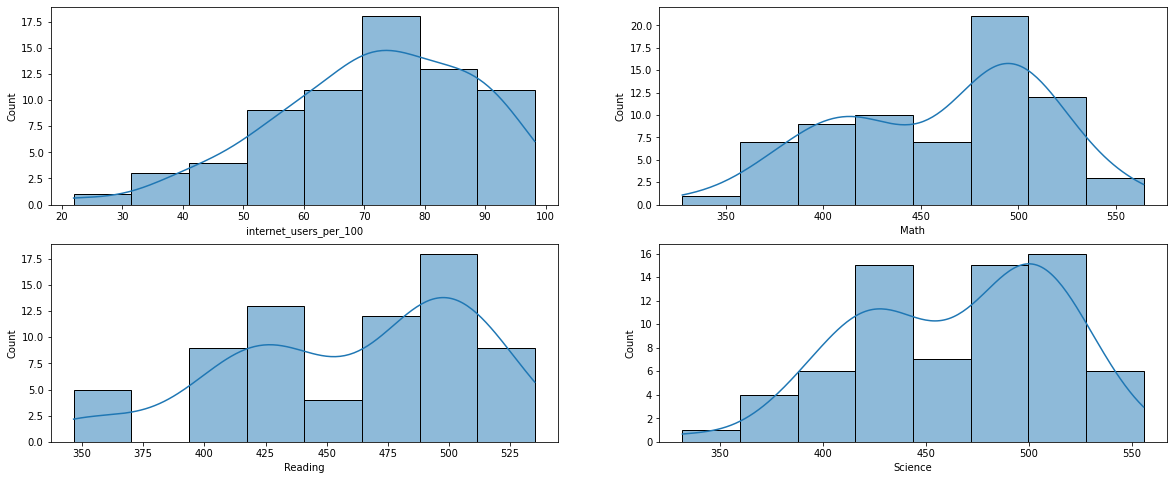

In [55]:
#distribute the PISA scores
fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.histplot(pisa['internet_users_per_100'], kde=True, ax=axes[0,0])
sns.histplot(pisa['Math'], kde=True, ax=axes[0,1])
sns.histplot(pisa['Reading'], kde=True, ax=axes[1,0])
sns.histplot(pisa['Science'], kde=True, ax=axes[1,1]);

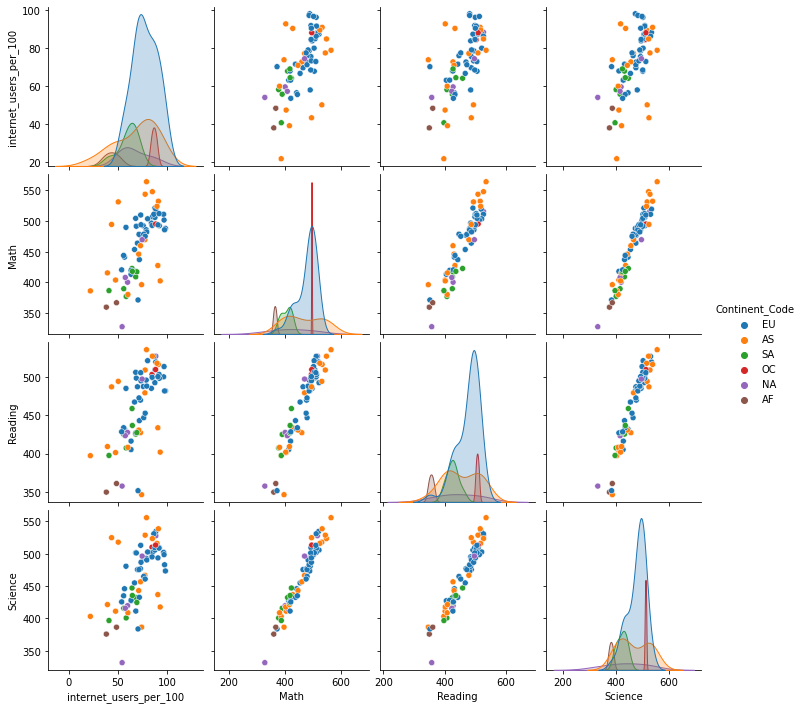

In [58]:
sns.pairplot(pisa, hue = 'Continent_Code');

## ***EU***

In [59]:
EU = pisa[pisa["Continent_Code"]=="EU"]
EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [60]:
EU.describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [61]:
EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

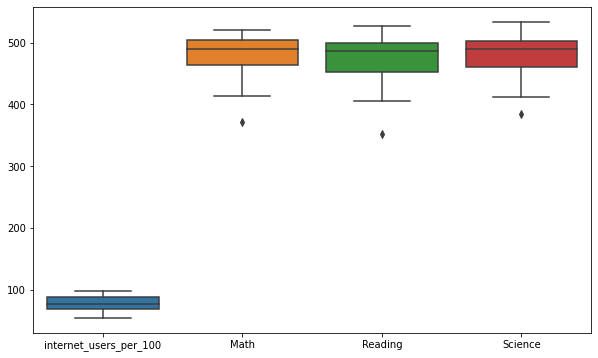

In [63]:
fig = plt.subplots(figsize=(10, 6))

sns.boxplot(data=EU);

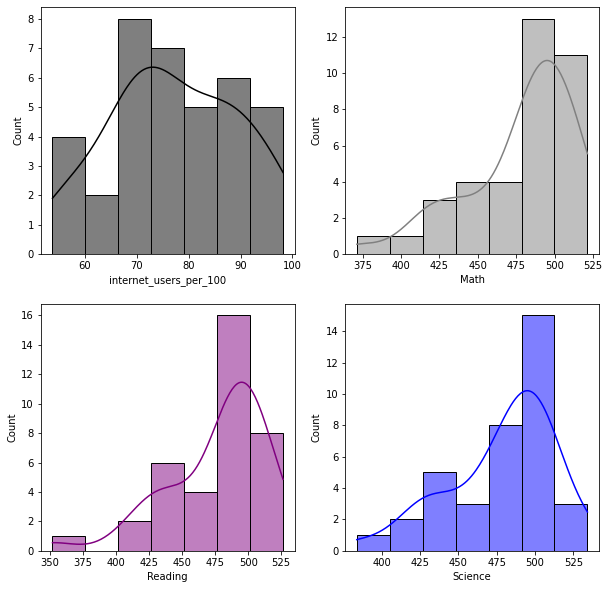

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=EU, x="internet_users_per_100", kde=True, color="black", ax=axs[0, 0])
sns.histplot(data=EU, x="Math", kde=True, color="gray", ax=axs[0, 1])
sns.histplot(data=EU, x="Reading", kde=True, color="purple", ax=axs[1, 0])
sns.histplot(data=EU, x="Science", kde=True, color="blue", ax=axs[1, 1]);

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [24]:
scores = pd.read_csv("students_2014 - students_2014.csv", sep = ",", na_values = ".", index_col = 0)

In [26]:
scores.head()

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,,
43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [27]:
scores[["English", "Math"]].isnull().value_counts()

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [28]:
df_scoresdrop = scores[["English", "Math"]].dropna()

In [29]:
df_scoresdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 43783 to 39298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  398 non-null    float64
 1   Math     398 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


In [30]:
scores[["English", "Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [31]:
Eng_av =scores['English'].mean()
Eng_av

82.78755501222493

In [32]:
Math_av = df_scores['Math'].mean()
Math_av

65.46800947867297

In [33]:
meandiff = Eng_av - Math_av
meandiff

17.31954553355196

In [41]:
stats.ttest_ind(scores.dropna()["English"], scores.dropna()["Math"])

Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [42]:
paired = stats.ttest_rel(scores["English"], scores["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [43]:
t = paired.statistic
t

36.31256898171986

In [44]:
pvalue= paired.pvalue
pvalue

3.071098719220689e-128

In [45]:
critical_pvalue = 0.025

if pvalue < critical_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
